In [ ]:
!pip install git+https://github.com/Bots-Avatar/ExplainitAll -q

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from sentence_transformers import SentenceTransformer

from explainitall.QA.extractive_qa_sbert.SVDBert import SVDBertModel
from explainitall.embedder_interp.embd_interpret import ModelInterp
from explainitall.gui.interface import set_verbosity_error
set_verbosity_error()

In [3]:
model_distil = SentenceTransformer("FractalGPT/SbertDistil")

model_svd = SentenceTransformer('FractalGPT/SbertSVDDistil')
model_svd[0].auto_model = SVDBertModel.from_pretrained('FractalGPT/SbertSVDDistil')

model_orig = SentenceTransformer("sentence-transformers/paraphrase-multilingual-MiniLM-L12-v2")
model_mp = SentenceTransformer("sentence-transformers/paraphrase-multilingual-mpnet-base-v2")

modules.json:   0%|          | 0.00/341 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/2.58k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/680 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/47.1M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.43k [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/241k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/706k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/695 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

2_Dense/config.json:   0%|          | 0.00/114 [00:00<?, ?B/s]

2_Dense/pytorch_model.bin:   0%|          | 0.00/482k [00:00<?, ?B/s]

modules.json:   0%|          | 0.00/341 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/6.24k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/685 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/44.2M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.43k [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/241k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/706k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/695 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

2_Dense/pytorch_model.bin:   0%|          | 0.00/482k [00:00<?, ?B/s]

2_Dense/config.json:   0%|          | 0.00/114 [00:00<?, ?B/s]

modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/4.12k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/645 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/471M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/480 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.08M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/4.13k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/723 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.11G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/402 [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.08M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [4]:
interp_distil = ModelInterp(model_distil)
interp_svd = ModelInterp(model_svd)
interp_orig = ModelInterp(model_orig)
interp_mp = ModelInterp(model_mp)

In [5]:
def sent_interp(interps, sent, names):
    '''Интерпретатор, анализ вклада слова в эмбеддинг'''

    plt.figure(figsize=(len(sent.split(' ')) * 1.5, 4))

    for i, interp in enumerate(interps):
        q = interp.seq_interp(sent)
        plt.bar(q['words'], q['imp'], alpha=0.8, label=names[i])
    plt.xlabel("Слова", fontsize=15)
    plt.ylabel("Вклад в эбеддинг", fontsize=15)
    plt.legend(fontsize=13)
    plt.grid()


def clusters_interp(interp, clusters, name):
    '''Анализ влияния кластеров на эмбеддинг'''

    interp_stat = interp.clusters_interp(clusters)
    names = [cl['name'] for cl in interp_stat]
    sen = [cl['sensitivity'] for cl in interp_stat]
    energy = np.array([cl['mean'] for cl in interp_stat])
    energy /= energy.sum()

    f, (ax1, ax2) = plt.subplots(2, 1, sharey=True)
    ax1.set_title(name, fontsize=16)
    ax1.bar(names, sen)
    ax1.grid()

    ax2.bar(names, energy)
    ax2.grid()

    ax2.set_xlabel("Кластеры", fontsize=13)
    ax2.set_ylabel("Важность", fontsize=10)
    ax1.set_ylabel("Точность описания", fontsize=10)

In [6]:
sent = 'Вероятно, её пионерами могли быть очень редкие, уникальные по поведению особи, наиболее толерантные к человеку'

clusters = [
    {'name': 'Животные',
     'elements': ['кошка', 'африканский слон', 'северный олень', 'заяц', 'опосум', 'собака', 'волк', 'медведь']},
    {'name': 'Коты', 'elements': ['кошка', 'котенок', 'кот', 'сибирская кошка', 'персидская кошка']},
    {'name': 'Транспорт', 'elements': ['самолет', 'вертолет', 'машина', 'катер', 'звездолет']},
    {'name': 'Грибы', 'elements': ['водорослями', 'цианобактериями', 'фитопатогенные']},
    {'name': 'Связь', 'elements': ['телефон', 'телеграф', 'рация', 'приемник', 'передатчик']},
    {'name': 'Имена', 'elements': ['Андрей', 'Сергей', 'Игорь', 'Николай', 'Александр']}
]

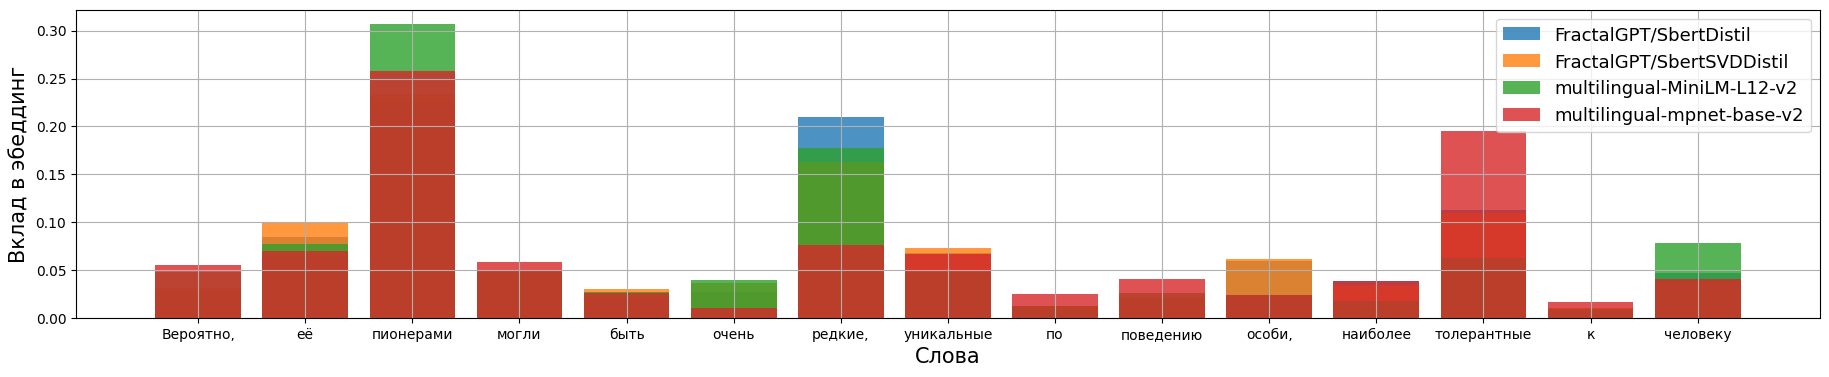

In [7]:
interps = [interp_distil, interp_svd, interp_orig, interp_mp]
names = ['FractalGPT/SbertDistil', 'FractalGPT/SbertSVDDistil', 'multilingual-MiniLM-L12-v2',
         'multilingual-mpnet-base-v2']
sent_interp(interps, sent, names)

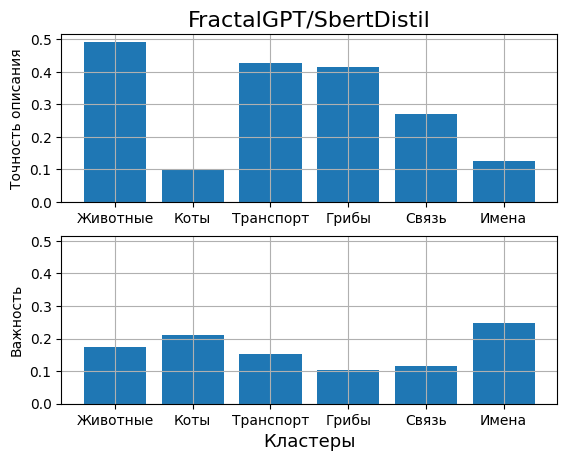

In [8]:
clusters_interp(interps[0], clusters, names[0])

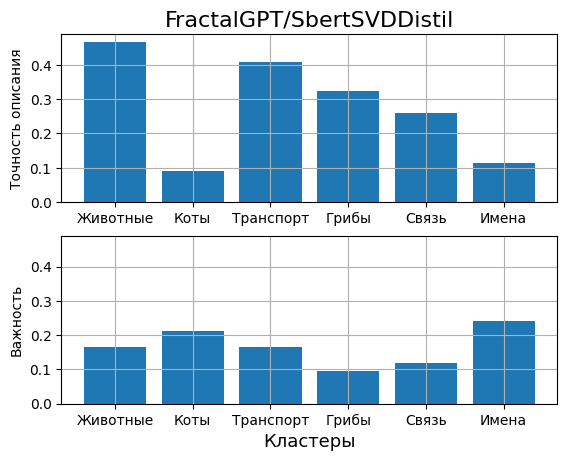

In [9]:
clusters_interp(interps[1], clusters, names[1])

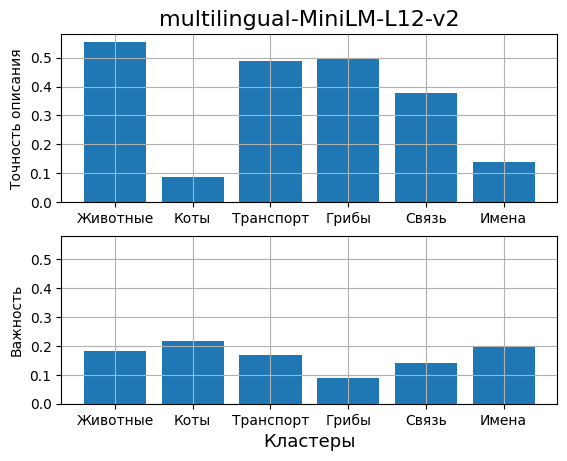

In [10]:
clusters_interp(interps[2], clusters, names[2])

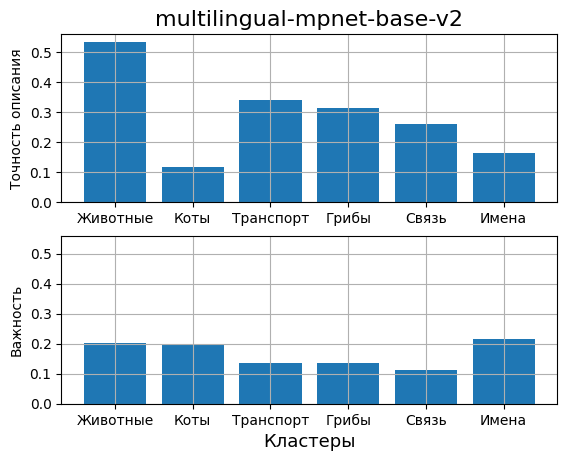

In [11]:
clusters_interp(interps[3], clusters, names[3])